In [24]:
import time

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from kohenen_map import KohonenNetwork 
from kohonen_layer_topologies import Topology


In [2]:
df = pd.read_csv('iris.csv').drop("Id", axis=1)
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


<Figure size 1000x600 with 0 Axes>

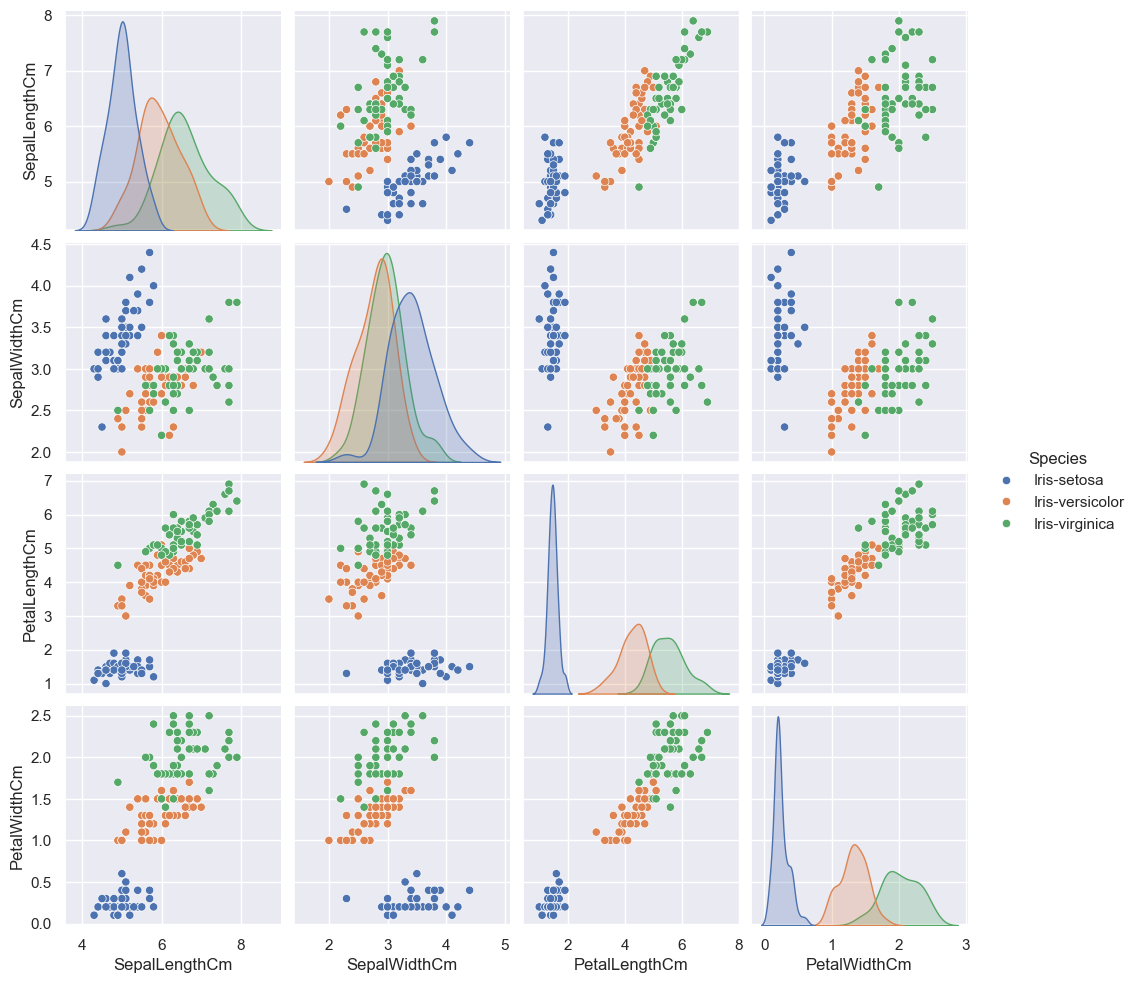

In [3]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.pairplot(data=df, hue="Species")

In [4]:
features = df.drop("Species", axis=1)
normalized_input_patterns = ((features - features.min()) / (features.max() - features.min())).values

In [7]:
from collections import Counter

def map_cluster_to_species(predicted_df):
    unique_clusters = predicted_df["Cluster"].unique()
    clusters_to_label = {}
    
    for cluster in unique_clusters:
        clusters_to_label[cluster] = []
        
    for cluster, species in zip(predicted_df["Cluster"], df["Species"]):
        clusters_to_label[cluster].append(species)
        
    map_clusters = {}
    
    for cluster in clusters_to_label:
        counter = Counter(clusters_to_label[cluster])
            
        map_clusters[cluster] = counter.most_common(1)[0][0]
        
    return map_clusters

In [15]:
from sklearn.metrics import accuracy_score

learning_rate = 0.00001
learning_rate_step = 0.00001
learning_rate_stop = 0.005

learning_rates = np.arange(learning_rate, learning_rate_stop, learning_rate_step)

num_of_epochs = 100
lr_decay = 0.99

accuracies_lr = []
learning_rates = []

for lr in learning_rates:
    
    kohonen = KohonenNetwork(4, 100, (10,10), Topology.HEXAGONAL)
    start_time = time.time()
    
    kohonen.train_network(normalized_input_patterns, lr, 4, num_of_epochs, lr_decay)
    
    end_time = time.time()
    predicted_labels = kohonen.predict_labels(normalized_input_patterns)
    predicted_df = features.copy(True)
    predicted_df["Cluster"] = predicted_labels
    cluster_to_species_map = map_cluster_to_species(predicted_df)
    for i in range(len(predicted_df)):
        predicted_df.at[i, "Species"] = cluster_to_species_map[predicted_df.at[i, "Cluster"]]
    acc = accuracy_score(df['Species'], predicted_df["Species"])
    accuracies_lr.append(acc)
    learning_rates.append(learning_rate)
    print(f"Learning rate: {learning_rate}, accuracy: {acc}, time: {end_time - start_time}")
    learning_rate += learning_rate_step


Learning rate: 1e-05, accuracy: 0.7133333333333334, time: 1.7558977603912354
Learning rate: 2e-05, accuracy: 0.6666666666666666, time: 1.6650090217590332
Learning rate: 3e-05, accuracy: 0.66, time: 1.7138137817382812
Learning rate: 4e-05, accuracy: 0.6266666666666667, time: 1.749429702758789
Learning rate: 5e-05, accuracy: 0.7333333333333333, time: 1.7732133865356445
Learning rate: 6e-05, accuracy: 0.76, time: 1.7753894329071045
Learning rate: 7e-05, accuracy: 0.68, time: 1.753722906112671
Learning rate: 8e-05, accuracy: 0.7733333333333333, time: 1.6226186752319336
Learning rate: 9e-05, accuracy: 0.7266666666666667, time: 1.7267727851867676
Learning rate: 0.0001, accuracy: 0.74, time: 1.7200582027435303
Learning rate: 0.00011, accuracy: 0.7933333333333333, time: 1.6476330757141113
Learning rate: 0.00012, accuracy: 0.7666666666666667, time: 1.7493088245391846
Learning rate: 0.00013, accuracy: 0.7066666666666667, time: 1.75026273727417
Learning rate: 0.00014, accuracy: 0.8066666666666666

In [26]:
import math
from sklearn.metrics import accuracy_score

n = 2
n_step = 1
n_limit = 20
num_of_epochs = 100
lr_decay = 0.99
number_of_neurodes = np.arange(n, n_limit, n_step)

accuracies_n = []
neurons_in_layer = []

for neurodes in number_of_neurodes:
    kohonen = KohonenNetwork(4, neurodes**2, (neurodes,neurodes), Topology.HEXAGONAL)
    start_time = time.time()
    
    kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(neurodes/1.5), num_of_epochs, lr_decay)
    
    end_time = time.time()
    predicted_labels = kohonen.predict_labels(normalized_input_patterns)
    predicted_df = features.copy(True)
    predicted_df["Cluster"] = predicted_labels
    cluster_to_species_map = map_cluster_to_species(predicted_df)
    for i in range(len(predicted_df)):
        predicted_df.at[i, "Species"] = cluster_to_species_map[predicted_df.at[i, "Cluster"]]
    acc = accuracy_score(df['Species'], predicted_df["Species"])
    accuracies_n.append(acc)
    neurons_in_layer.append(n)
    print(f"Number of neurons in kohonen layer: {n}, accuracy: {acc}, time: {end_time - start_time}")
    n += n_step

Number of neurons in kohonen layer: 2, accuracy: 0.3333333333333333, time: 0.24389195442199707
Number of neurons in kohonen layer: 3, accuracy: 0.6666666666666666, time: 0.4002711772918701
Number of neurons in kohonen layer: 4, accuracy: 0.6466666666666666, time: 0.546802282333374
Number of neurons in kohonen layer: 5, accuracy: 0.7466666666666667, time: 0.6460676193237305
Number of neurons in kohonen layer: 6, accuracy: 0.7, time: 0.8161382675170898
Number of neurons in kohonen layer: 7, accuracy: 0.74, time: 0.995793342590332
Number of neurons in kohonen layer: 8, accuracy: 0.7133333333333334, time: 1.1997826099395752
Number of neurons in kohonen layer: 9, accuracy: 0.8, time: 1.5088789463043213
Number of neurons in kohonen layer: 10, accuracy: 0.7666666666666667, time: 1.6574597358703613
Number of neurons in kohonen layer: 11, accuracy: 0.78, time: 2.060473680496216
Number of neurons in kohonen layer: 12, accuracy: 0.8066666666666666, time: 2.2721893787384033
Number of neurons in ko

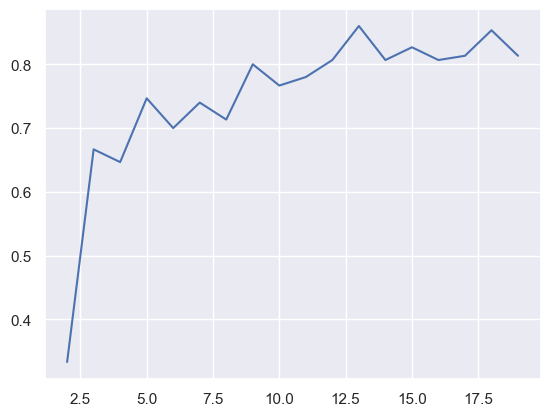

In [27]:
plt.plot(neurons_in_layer, accuracies_n)


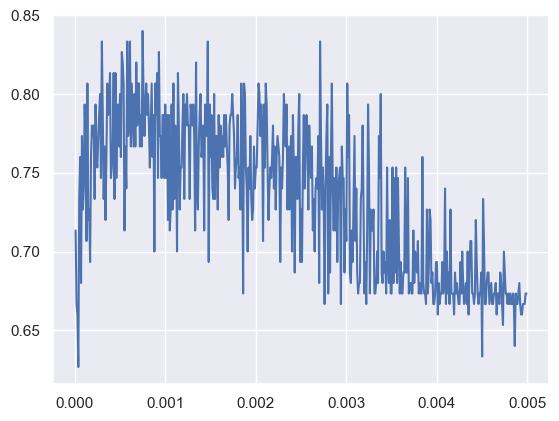

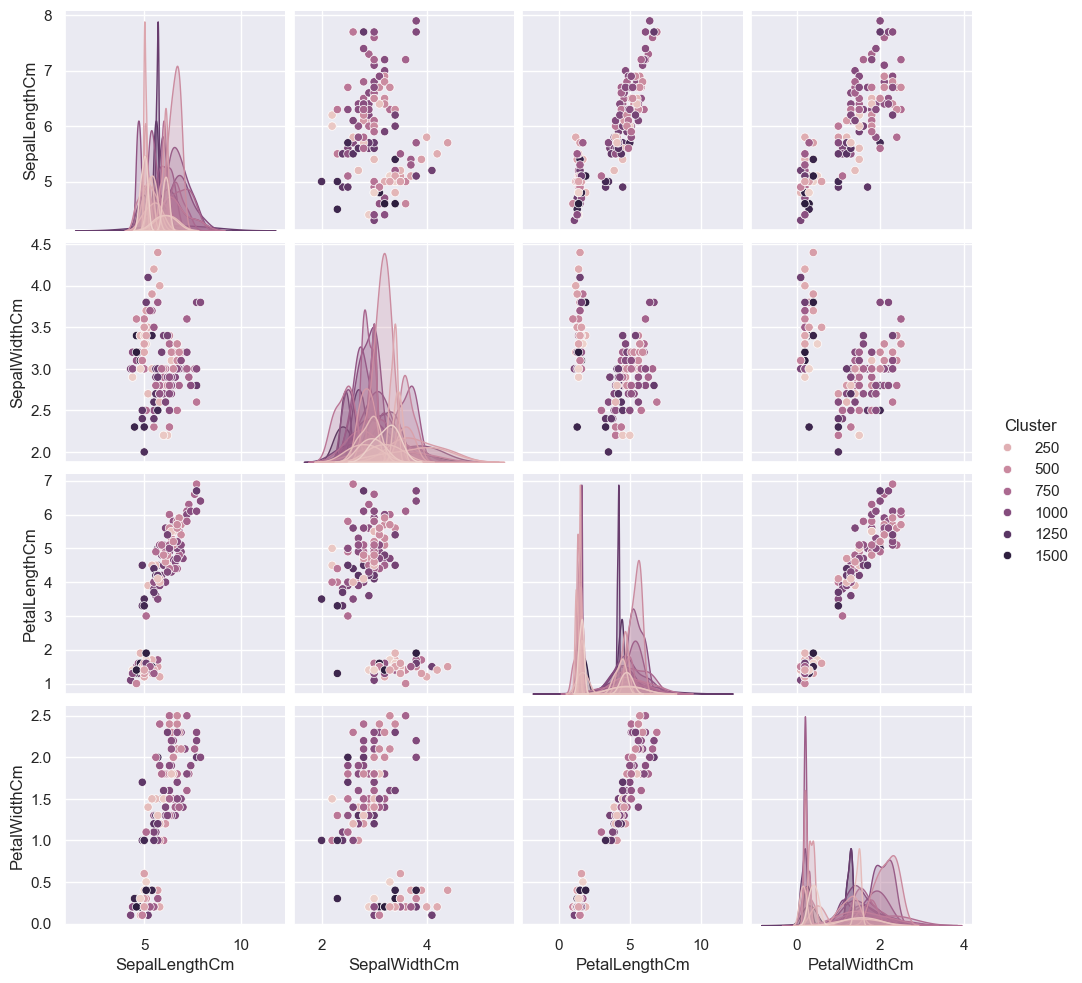

In [22]:
from pandas import DataFrame
plt.plot(learning_rates, accuracies_lr)
predicted_labels = kohonen.predict_labels(normalized_input_patterns)
predicted_df = features.copy(True)
predicted_df["Cluster"] = predicted_labels
sns.pairplot(predicted_df, hue="Cluster")


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   SortOrder  
0          0  
1          0  
2          0  
3          0  
4          0  
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


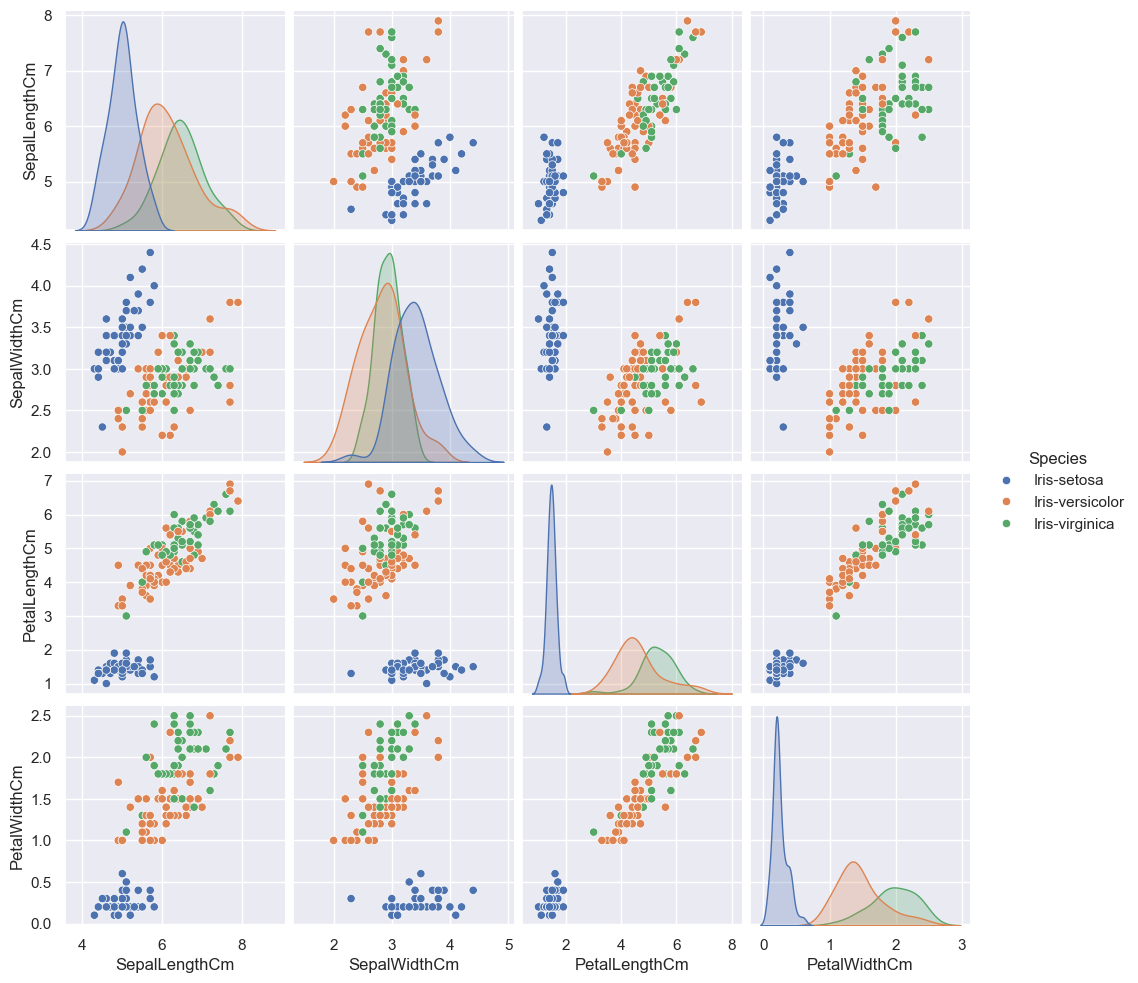

In [19]:
#merge clusters
map_clusters = map_cluster_to_species(predicted_df)

for i in range(len(predicted_df)):
    predicted_df.at[i, "Species"] = map_clusters[predicted_df.at[i, "Cluster"]]

predicted_df.drop(["Cluster"], axis=1, inplace=True)
custom_order = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
predicted_df["SortOrder"] = predicted_df["Species"].map(custom_order)
print(predicted_df.head())
predicted_df.sort_values("SortOrder")
predicted_df.drop(["SortOrder"], axis=1, inplace=True)
print(predicted_df.head())
sns.pairplot(predicted_df, hue="Species")


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(df["Species"], predicted_df["Species"])
confusion_matrix = confusion_matrix(df["Species"], predicted_df["Species"])

print(accuracy)
print(confusion_matrix)

0.8666666666666667
[[50  0  0]
 [ 0 44  6]
 [ 0 14 36]]
